# Week 4: Day 3 AM // Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, Seaborn remains an extremely useful addon.

## Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:

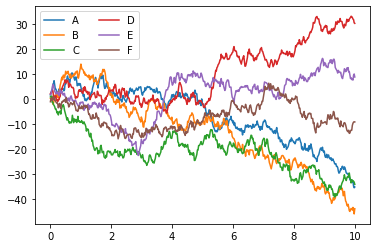

In [ ]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [ ]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

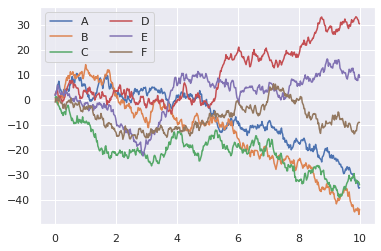

In [ ]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Ah, much better!

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Starting with the very basic scatter plots in Matplotlib and then Seaborn to show the difference even in the basic part in the same plots. The basic scatter plot of sepal length vs sepal width in Matplotlib:

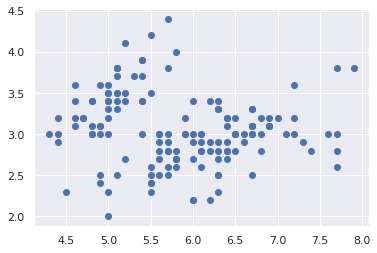

In [ ]:
plt.scatter(iris.sepal_length, iris.sepal_width)

Here is the same basic plot in seaborn:

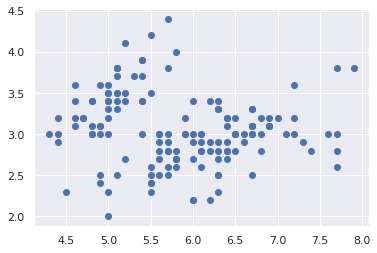

In [ ]:
sns.set()
plt.scatter(iris.sepal_length, iris.sepal_width)

You can see that it added a style without even writing much extra code!

I will try to keep it as precise as possible. Most of the code will be almost self-explanatory. Please take the code and run it in your own notebook, change different options and play with it if you are reading this for learning. That’s the only way to learn.

You already saw in the previous plot that how the .set() function can introduce a default seaborn style to the plot. Here is an example of set_style() function.

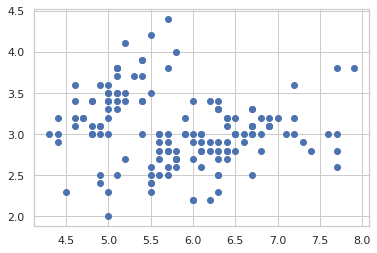

In [ ]:
sns.set_style('whitegrid')
plt.scatter(iris.sepal_length, iris.sepal_width)
plt.show()

The set_style() function has a few other style options: darkgrid, dark, white, and ticks. Please feel free to try them out.

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

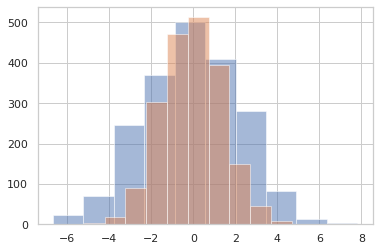

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

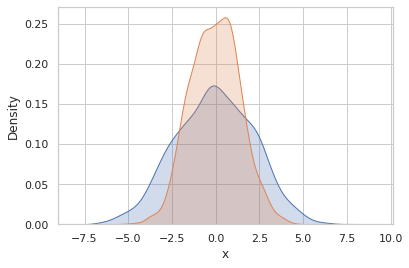

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using ``distplot``:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


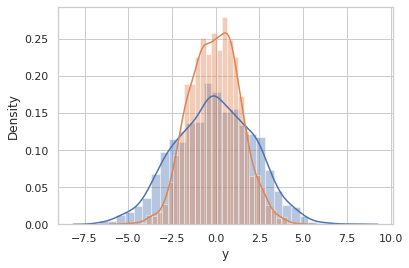

In [ ]:
sns.distplot(data['x'])
sns.distplot(data['y']);

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


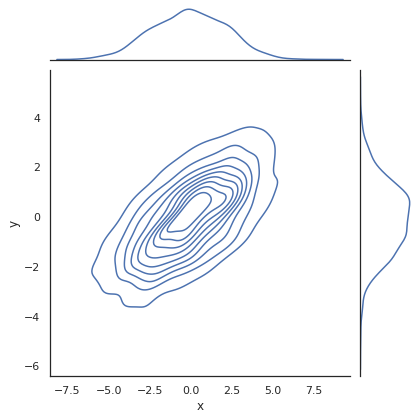

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


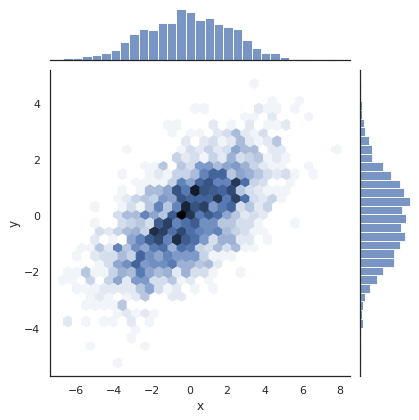

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


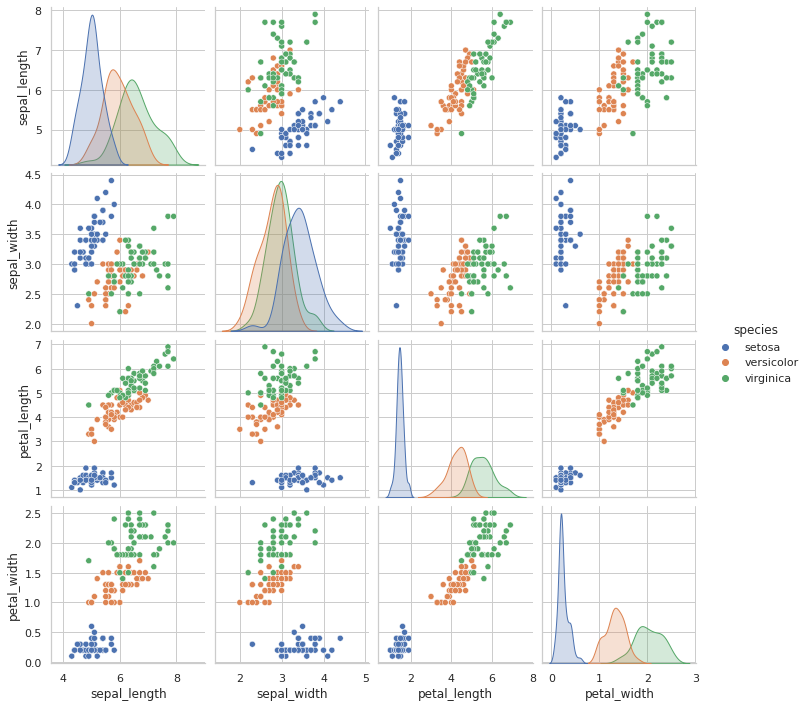

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


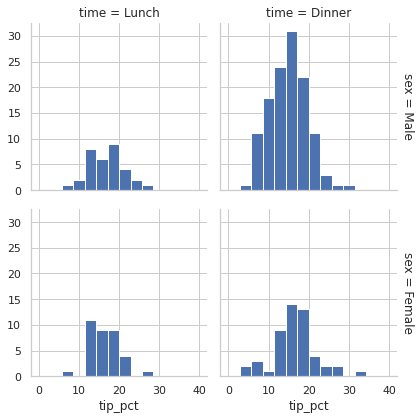

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


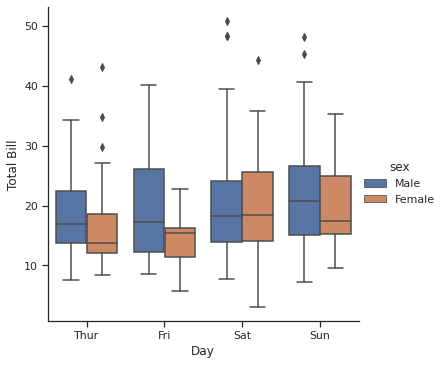

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


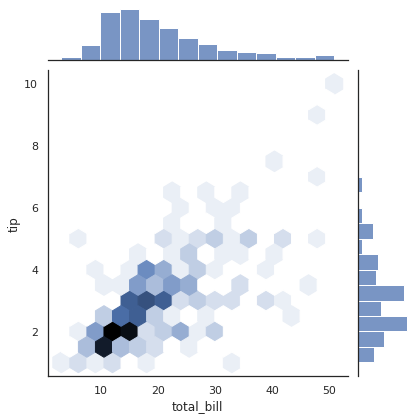

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


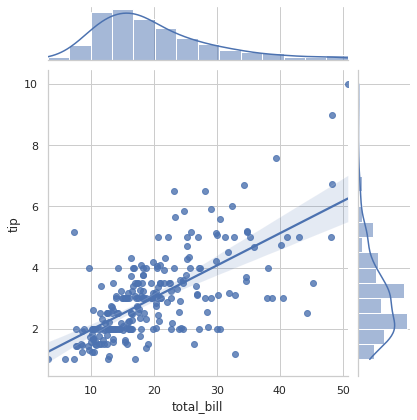

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

Time series can be plotted using ``sns.factorplot``.

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


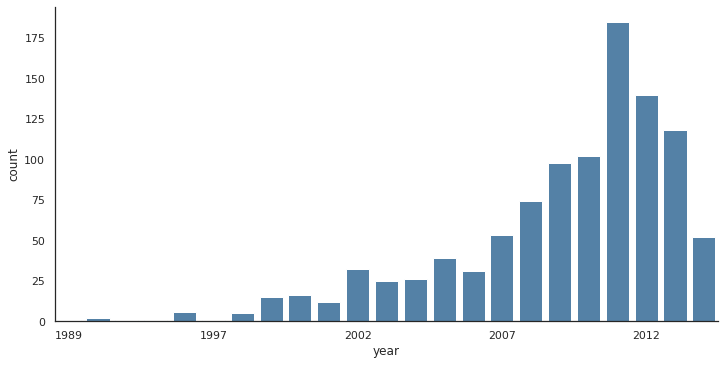

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


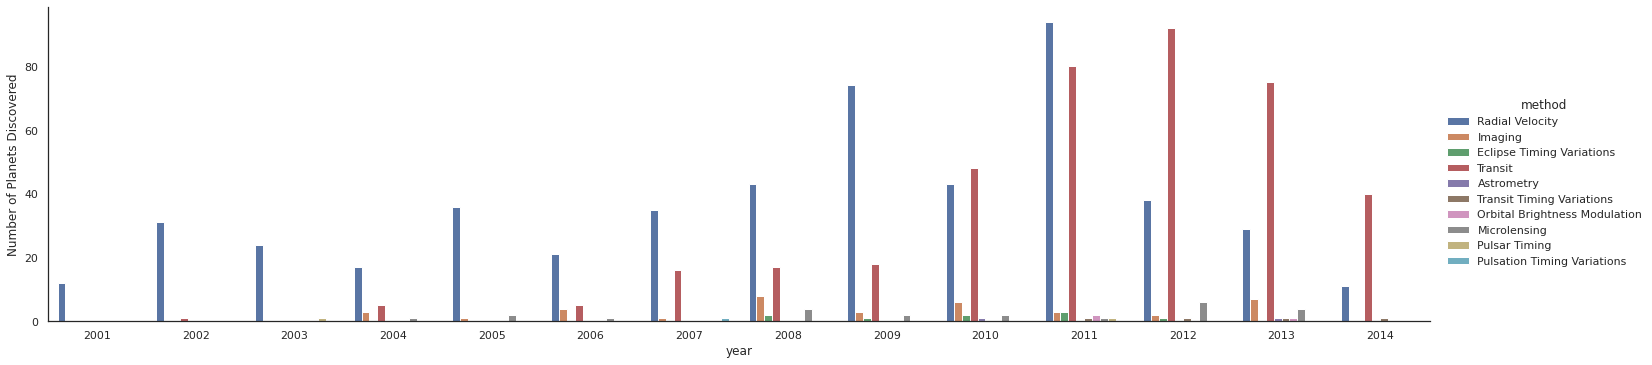

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


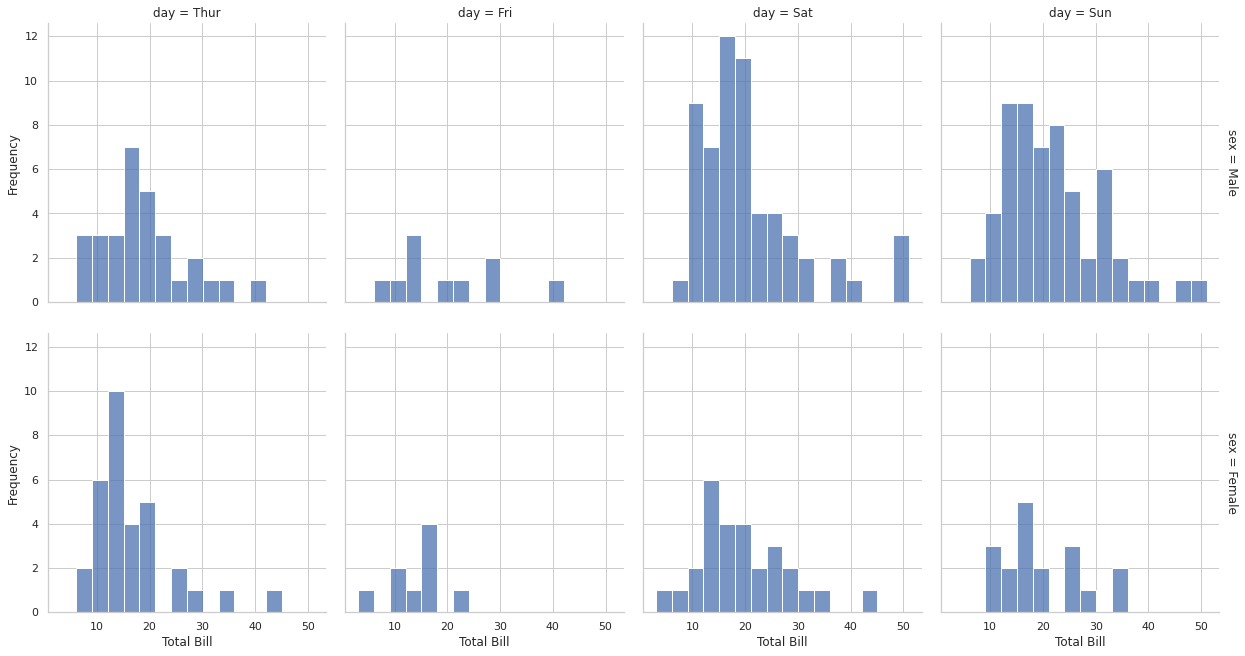

In [ ]:
g = sns.displot(
    tips, x="total_bill", col="day", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))
g.fig.set_size_inches(18, 10)
g.set_axis_labels("Total Bill", "Frequency")

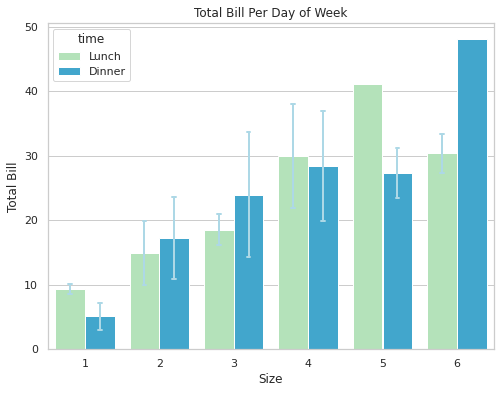

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='size', y= 'total_bill', hue='time', 
            palette = 'GnBu',
            data=tips, ci='sd',
           capsize=0.05,
           saturation=5,
           errcolor='lightblue',
           errwidth=2)
plt.xlabel("Size")
plt.ylabel("Total Bill")
plt.title("Total Bill Per Day of Week")
plt.show()

### Countplot

Countplots also look like a bar plot. But it shows the count of observations for each category.

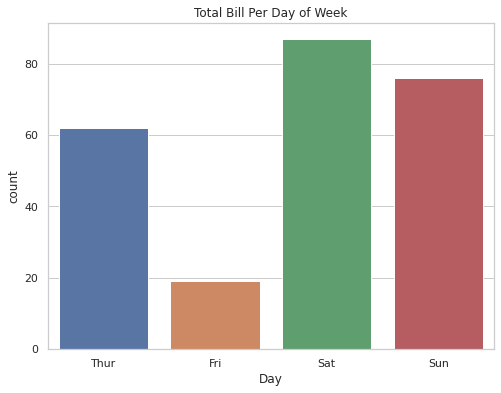

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='day', data=tips)
plt.xlabel("Day")
plt.title("Total Bill Per Day of Week")
plt.show()

This plot shows that how many total data are available for each day of the week. The ‘hue’ parameter can also be used here to segregate it by another categorical variable. I am taking the ‘time’ variable.

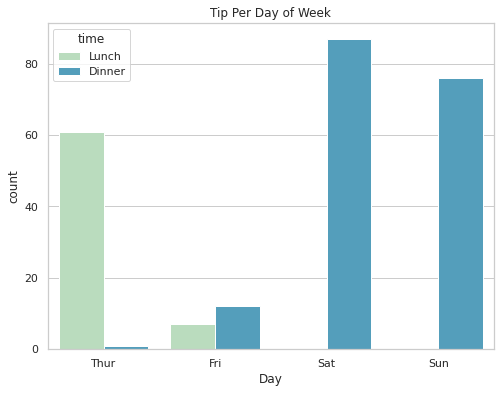

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'day', hue='time', 
            palette = 'GnBu',
            data=tips)
plt.xlabel("Day")
plt.title("Tip Per Day of Week")
plt.show()

### Swarmplot

This plot makes sure data do not overlap. More explanation after the plot.

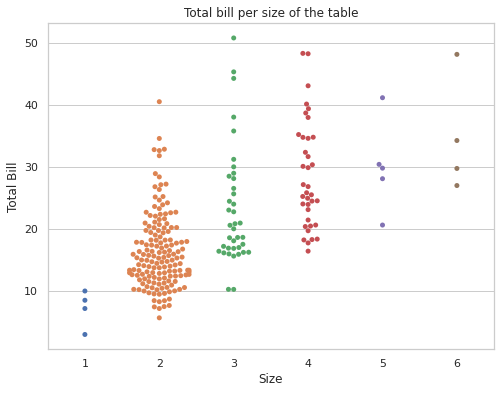

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.swarmplot(x='size', y='total_bill', data=tips)
plt.xlabel("Size")
plt.ylabel("Total Bill")
plt.title("Total bill per size of the table")
plt.show()

When the size is 1, there are only three dots and they are on the same line naturally not overlapping. But when the size is two, there are a lot of data in the same point, so by default swarmplot adjusted the position of the dots a little bit so they do not overlap each other.

This looks nice and also gives a better idea of how many data are there in each point when the dataset is not too large. If the dataset is too large swarmplot does not scale well.

In the next plot, I will add a ‘hue’ parameter that will show different colors for different genders.

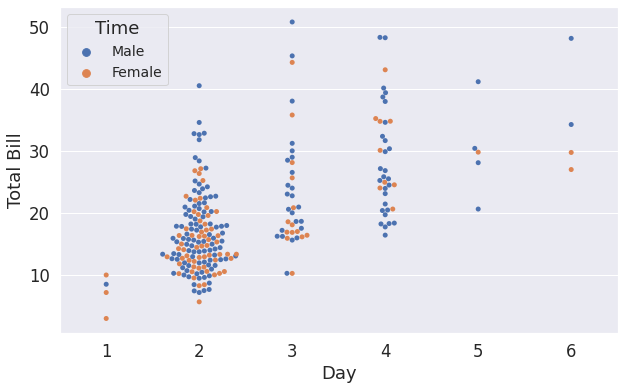

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
sns.swarmplot(x='size', y='total_bill', data=tips, hue="sex")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.legend(title="Time", fontsize=14)
plt.show()

The segregation of gender can be separated as well,

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


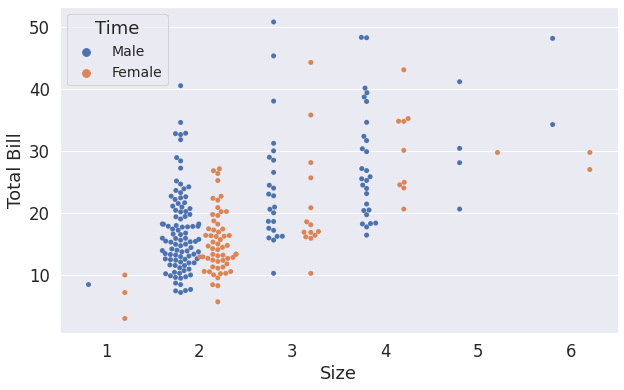

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
sns.swarmplot(x='size', y='total_bill', data=tips, hue="sex", split=True)
plt.xlabel("Size")
plt.ylabel("Total Bill")
plt.legend(title="Time", fontsize=14)
plt.show()

In this plot, there are separate swarms for males and females.

There is another plot called factor plot that is the same as a swarmplot but it is a facet grid plot. You can add multiple variables and present more information.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-package

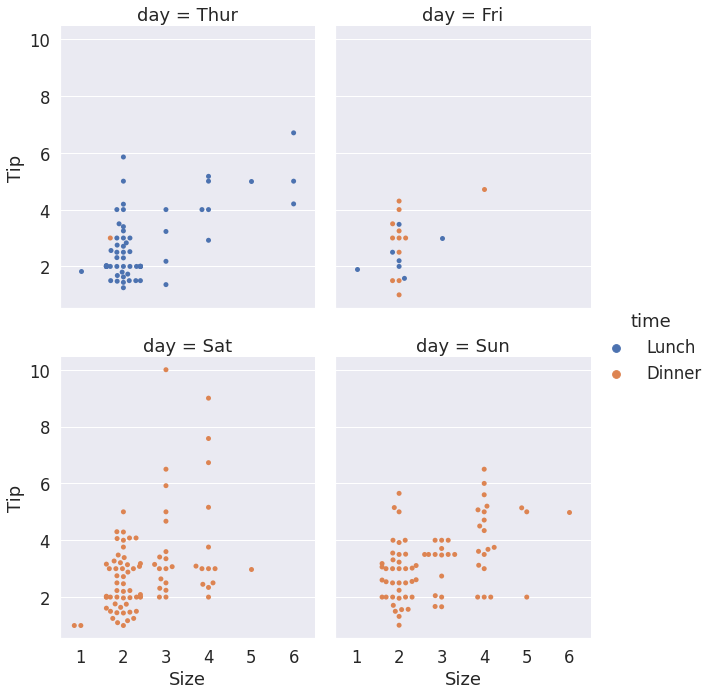

In [ ]:
g = sns.factorplot(x='size', y="tip",
              data=tips, hue="time",
              col="day", kind="swarm",
              col_wrap=2, size=4)
g.fig.set_size_inches(10, 10)
g.set_axis_labels("Size", "Tip")
plt.show()

This plot shows the tip amount per size for each day of the week and different colors represent different times of the meal. So much information packed in one plot!

### Pointplot

Pointplot can be very informative and more useful than bar plots. Here is a pointplot that shows the tip amount per day of the week. I will explain some more after the plot.

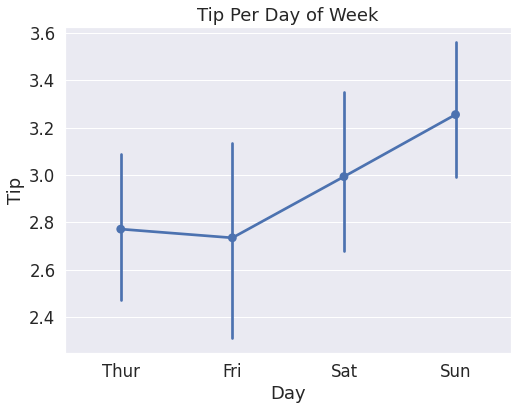

In [ ]:
plt.figure(figsize=(8, 6))
sns.pointplot(x="day", y="tip", data=tips)
plt.xlabel("Day")
plt.ylabel("Tip")
plt.title("Tip Per Day of Week")
plt.show()

The points here show the mean and the vertical lines represent the confidence interval. Sometimes less is more. Simple and yet so informative plot.

A ‘hue’ parameter can be added here to show the tip per day of the week by another categorical variable. I used gender here.

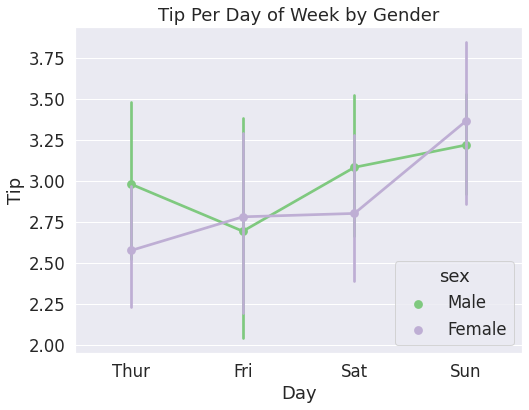

In [ ]:
plt.figure(figsize=(8, 6))
sns.pointplot(x="day", y="tip", hue="sex", data=tips, palette="Accent")
plt.xlabel("Day")
plt.ylabel("Tip")
plt.title("Tip Per Day of Week by Gender")
plt.show()

### Jitter plot

The jitter plot is a bit like the swarm plot shown earlier. This one also adjusts the coordinates of the dots a little to avoid too much cluttering. But it's a bit different. In the swarm plot, not a single dot was on top of another one. But in jitter plot, It spreads out only a specified amount. Here is a jitter plot below that specifies the jitter amount of 0.2. Also by default, it adds a linear regression line and a confidence band which is nice!

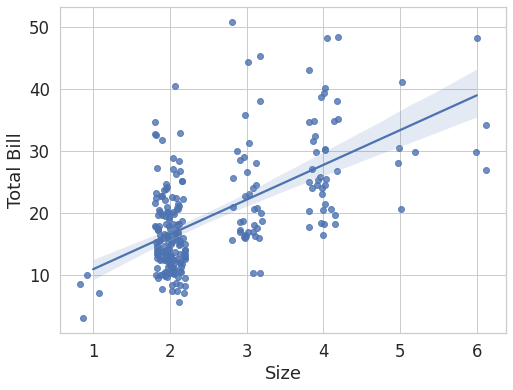

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.regplot(x='size', y='total_bill', data=tips, x_jitter=0.2)
plt.xlabel("Size")
plt.ylabel("Total Bill")
plt.show()

Notice, here the x-axis contains a categorical variable.

### lmplot

The lmplot is a combination of regplot and facet grid. This plot can show the linear regression line and confidence band for each conditional group. It may sound a bit obscure. Please look at this plot.

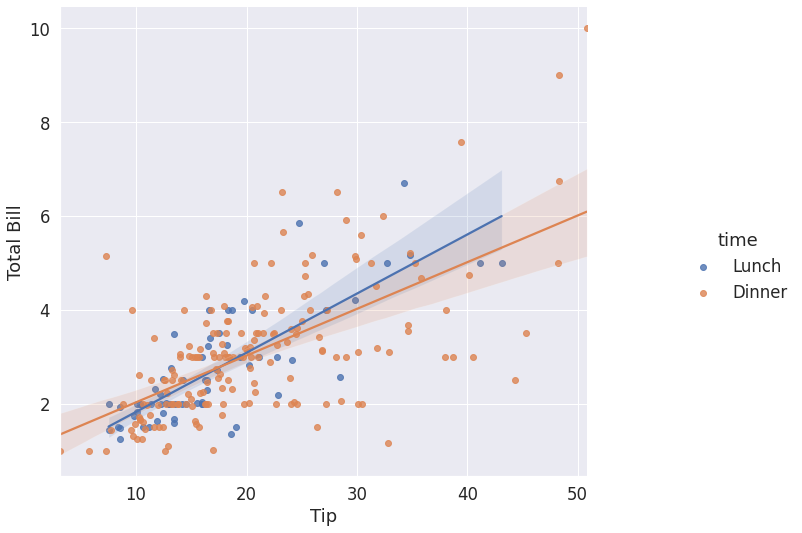

In [ ]:
sns.set(font_scale=1.5)
sns.lmplot(x='total_bill', y='tip', data = tips, 
           hue='time')
plt.gcf().set_size_inches(12, 8)
plt.ylabel("Total Bill")
plt.xlabel("Tip")
plt.show()

### violinplot

Here is a basic violin plot.

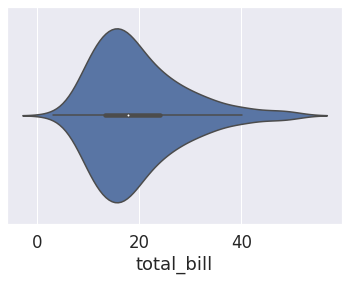

In [ ]:
ax = sns.violinplot(x=tips["total_bill"])

The Violin plot shows the distribution of the data. You may think it is like a histogram then. Yes, but it can be more advanced. Like the plot below shows the distribution of the total bill for each day by the smoker and non-smoker.

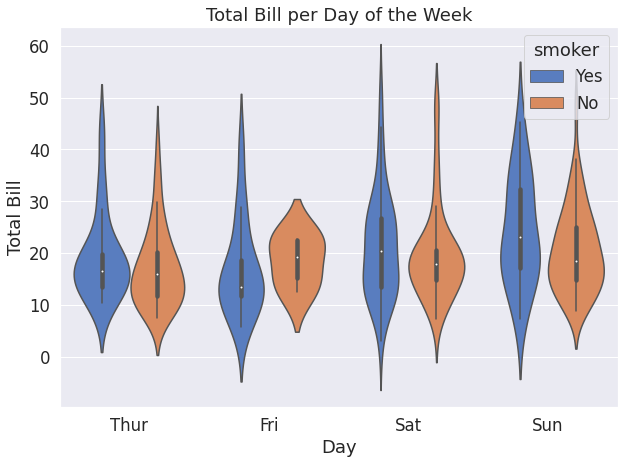

In [ ]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='day', y='total_bill', hue="smoker",
              data=tips, palette="muted")
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Total Bill per Day of the Week")
plt.show()

Instead of separating by two violins smoker and non-smoker portion can be shown in one violin on different sides. Look at this plot.

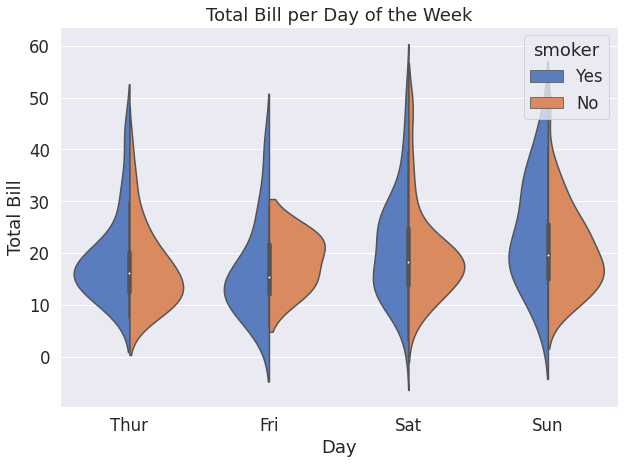

In [ ]:
plt.figure(figsize=(10, 7))
sns.violinplot(x='day', y='total_bill', hue="smoker",
              data=tips, palette="muted", split=True)
plt.xlabel("Day")
plt.ylabel("Total Bill")
plt.title("Total Bill per Day of the Week")
plt.show()

### Heatmap

Heatmaps are used to show the correlation between variables. Heatmap is very useful in many areas of data science. In data storytelling projects, this is a popular element, in machine learning it helps with choosing features.

This is a basic heatmap that shows the correlation between the total bill and tip amount.

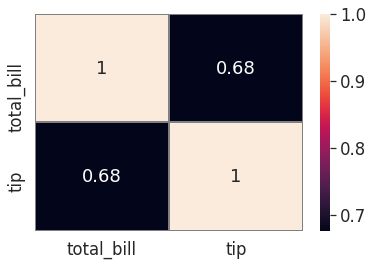

In [ ]:
sns.heatmap(tips[["total_bill", "tip"]].corr(), annot=True, 
            linewidths=0.9, linecolor="gray")
plt.show()

Let’s go back to the iris dataset. It will be interesting to see the correlations between the sepal length and width, petal length, and width.

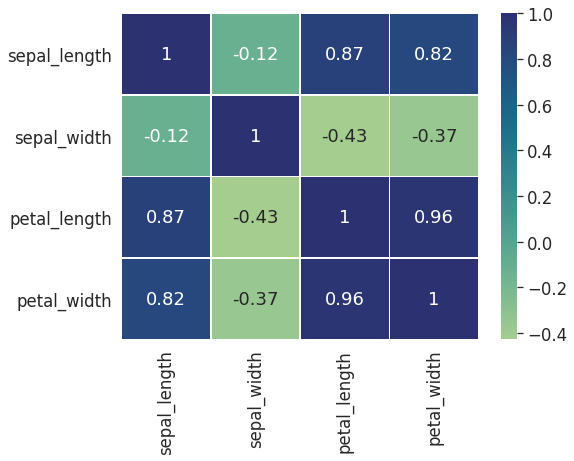

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris.corr(), annot=True, linewidths=0.5, cmap='crest')
plt.show()

## Example: Exploring Marathon Finishing Times

Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon.
I've scraped the data from sources on the Web, aggregated it and removed any identifying information, and put it on GitHub where it can be downloaded.
We will start by downloading the data from
the Web, and loading it into Pandas:

In [ ]:
!curl -O https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0  3530k      0 --:--:-- --:--:-- --:--:-- 3530k


In [ ]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


By default, Pandas loaded the time columns as Python strings (type ``object``); we can see this by looking at the ``dtypes`` attribute of the DataFrame:

In [ ]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Let's fix this by providing a converter for the times:

In [ ]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [ ]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

That looks much better. For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds:

In [ ]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


To get an idea of what the data looks like, we can plot a ``jointplot`` over the data:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


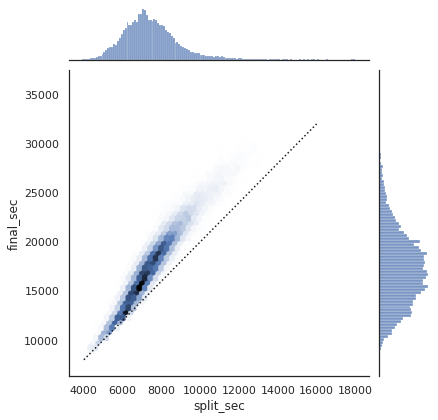

In [ ]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.
If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


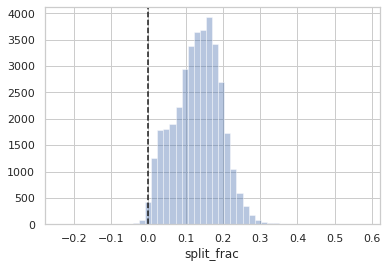

In [ ]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a ``pairgrid``, which draws plots of all these correlations:

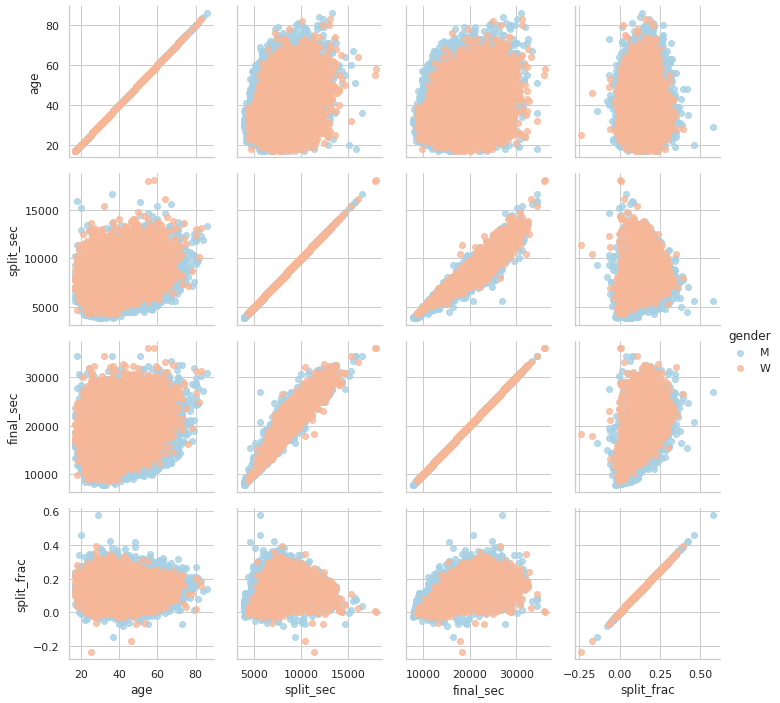

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.
(We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap.

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:

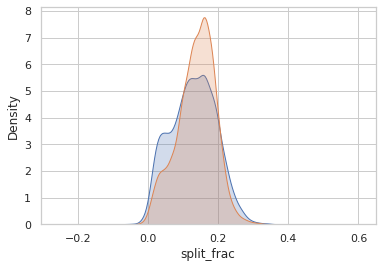

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

The interesting thing here is that there are many more men than women who are running close to an even split!
This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a *violin plot*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


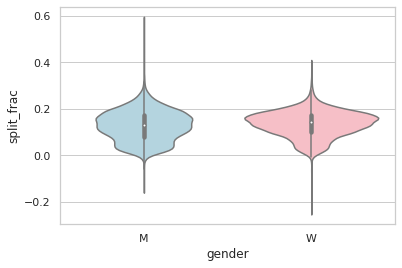

In [ ]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

This is yet another way to compare the distributions between men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


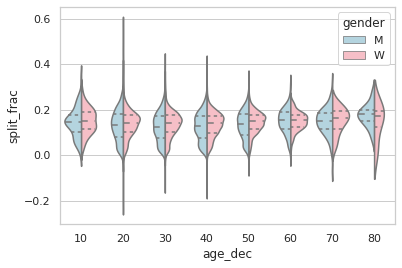

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform *everyone* in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [ ]:
(data.age > 80).sum()

7

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use ``regplot``, which will automatically fit a linear regression to the data:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


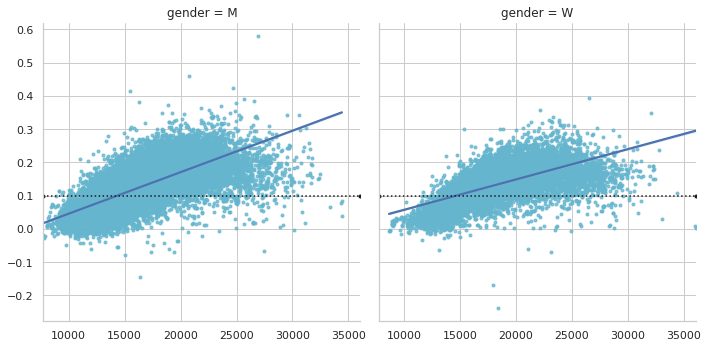

In [ ]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.

## Example: Exploring NHANES data

In [ ]:
!curl -O https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  540k  100  540k    0     0  2688k      0 --:--:-- --:--:-- --:--:-- 2702k


In [ ]:
df = pd.read_csv("nhanes_2015_2016.csv")

In [ ]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

Yes, they are. But don’t worry I will keep explaining as we go. So, it will be fine.

There are a few categorical columns in the dataset, we will use a lot. Like Gender (RIAGENDR), marital status(DMDMARTL), or education(DMDEDUC2) level. I want to convert them to some meaningful values rather than having some numbers.

In [ ]:
df["RIAGENDRx"] = df.RIAGENDR.replace({1: "Male", 2: "Female"}) 
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})
df["DMDMARTLx"] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 6: "Living w/partner", 77: "Refused"})

Probably the most basic plot that we learned was a line plot or a scatter plot. Here I will start with a scatter plot. But there will be a little twist to it.
For this demonstration, I will plot systolic(BPXDI1) vs systolic(BPXSY1) blood pressure. The little twist will be I will plot them in different colors for different marital statuses. It will be interesting to see if the marital status has any effect on blood pressure.

First, find out how many unique types of marital statuses are there in the dataset.

In [ ]:
category = df["DMDMARTLx"].unique()
category

array(['Married', 'Divorced', 'Living w/partner', 'Separated',
       'Never married', nan, 'Widowed', 'Refused'], dtype=object)

In [ ]:
colors = [plt.cm.tab10(i/float(len(category)-1)) for i in range(len(category))]
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

### Stripplot

This is an interesting type of plot. When multiple data points overlap each other and it is hard to see all the points, jittering some points a little bit gives you the chance to see each point clearly. Stripplot does exactly that.
For this demonstration, I will plot systolic blood pressure vs body mass index.

In [ ]:
df2 = df.loc[:500, :]
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

<Figure size 1280x800 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


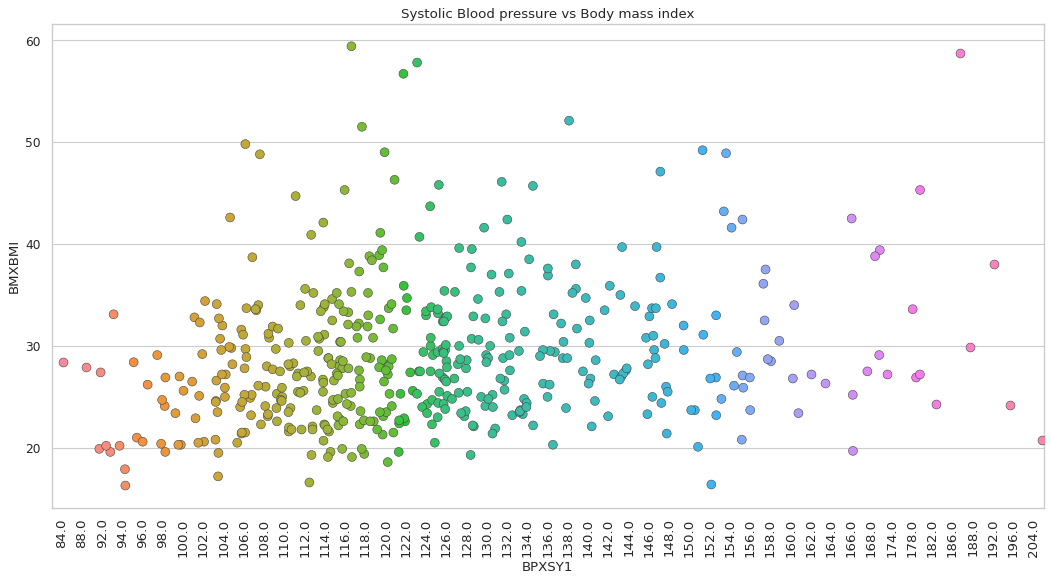

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=80)
sns.stripplot(df2.BPXSY1, df2.BMXBMI, jitter=0.45, size=8, ax=ax, linewidth=0.5)
plt.title("Systolic Blood pressure vs Body mass index")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=90)
plt.show()

Stripplots can be segregated by a categorical variable as well. But we do not need to use a loop the way we did in the scatter plot above. Stripplot has the ‘hue’ parameter that will do the job. Here I will plot Diastolic vs Systolic blood pressure segregated by Ethnic origin.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


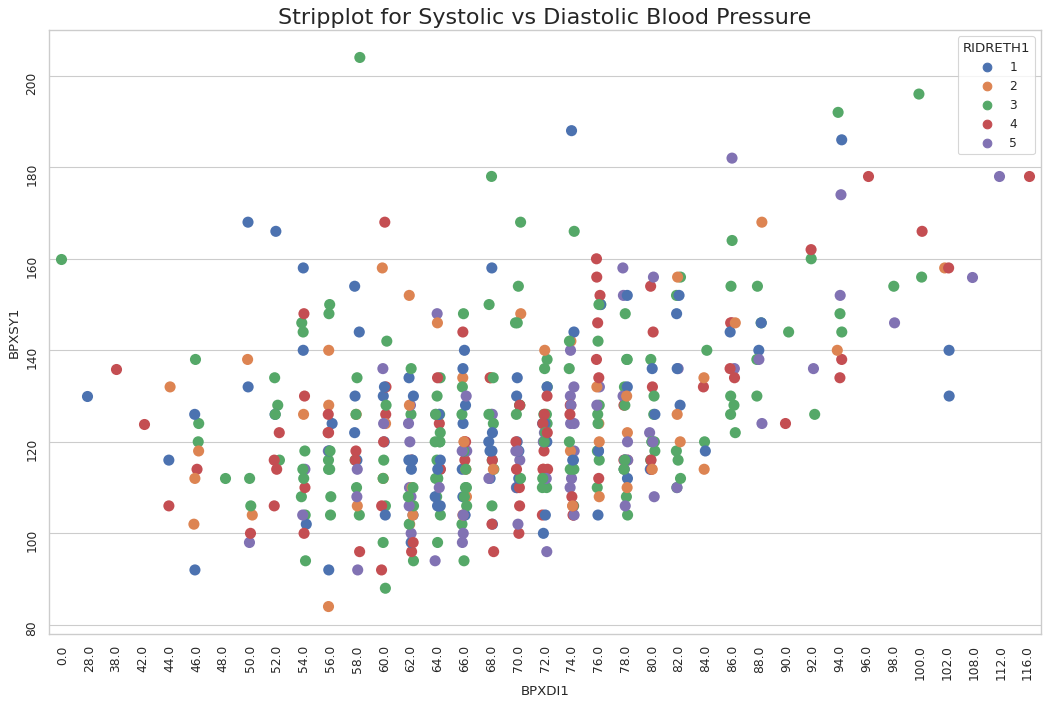

In [ ]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df2.BPXDI1, df2.BPXSY1, s=10, hue = df2.RIDRETH1, ax=ax)
plt.title("Stripplot for Systolic vs Diastolic Blood Pressure", fontsize=20)
plt.tick_params(rotation=90)
plt.show()

### Stripplot with Box plots

Scatter plots can be plotted together with boxplots. When there are a big dataset and a lot of dots, it provides you with a lot more information. Check for yourself here:

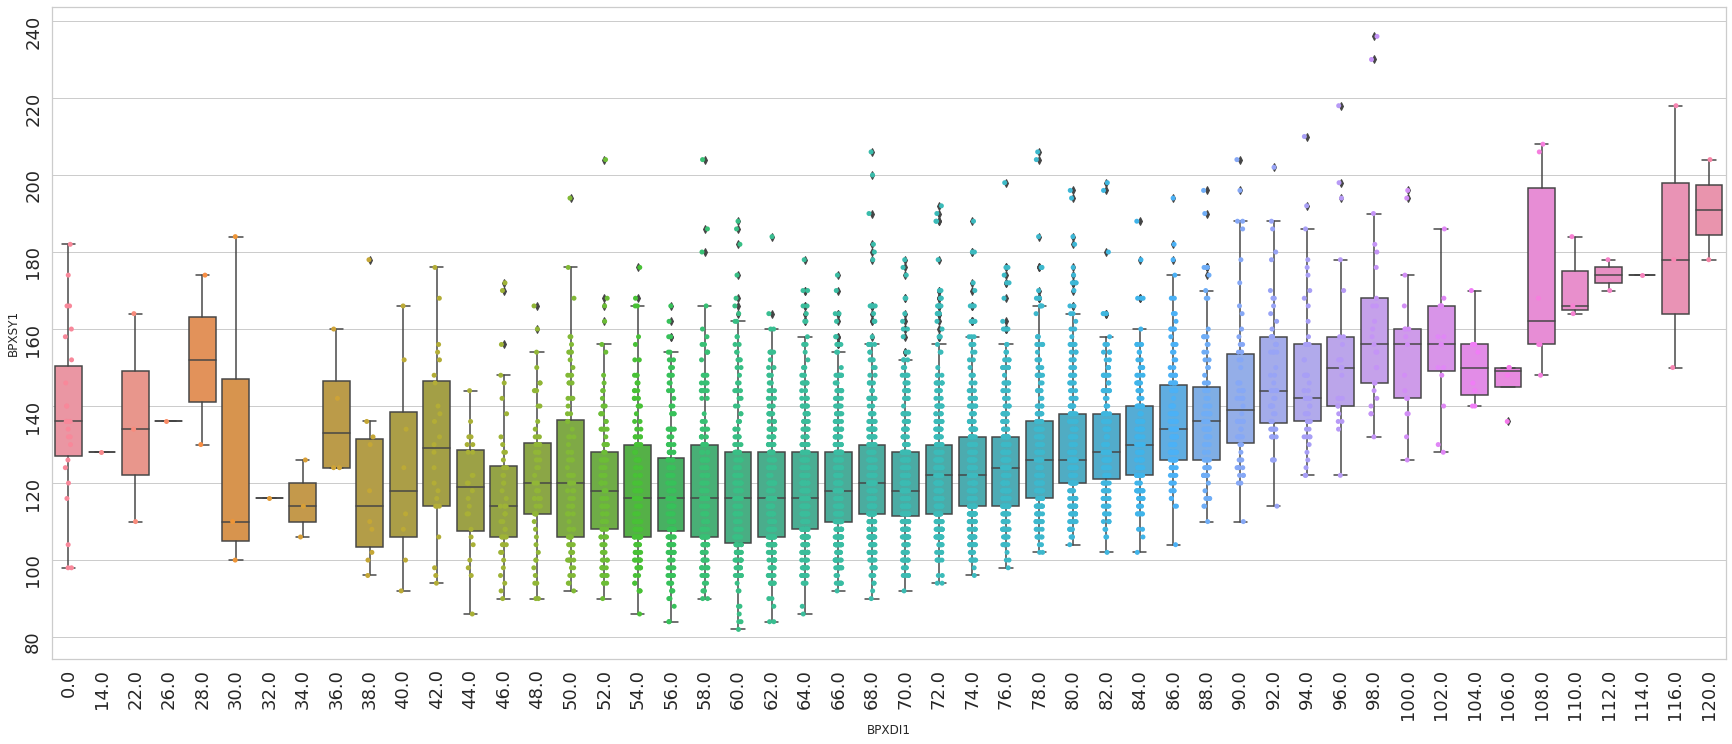

In [ ]:
fig, ax = plt.subplots(figsize=(30, 12))
ax = sns.boxplot(x="BPXDI1", y = "BPXSY1", data=df)
ax.tick_params(rotation=90, labelsize=18)
ax = sns.stripplot(x = "BPXDI1", y = "BPXSY1", data=df)

You can see the median, maximum, minimum, range, IQR, outliers in each individual point. Isn’t it great!

### Stripplot with Violin Plot

We will present Marital status(DMDMARTLx) vs Age(RIDAGEYR). Let’s see how it looks first. Then we will talk about it some more.

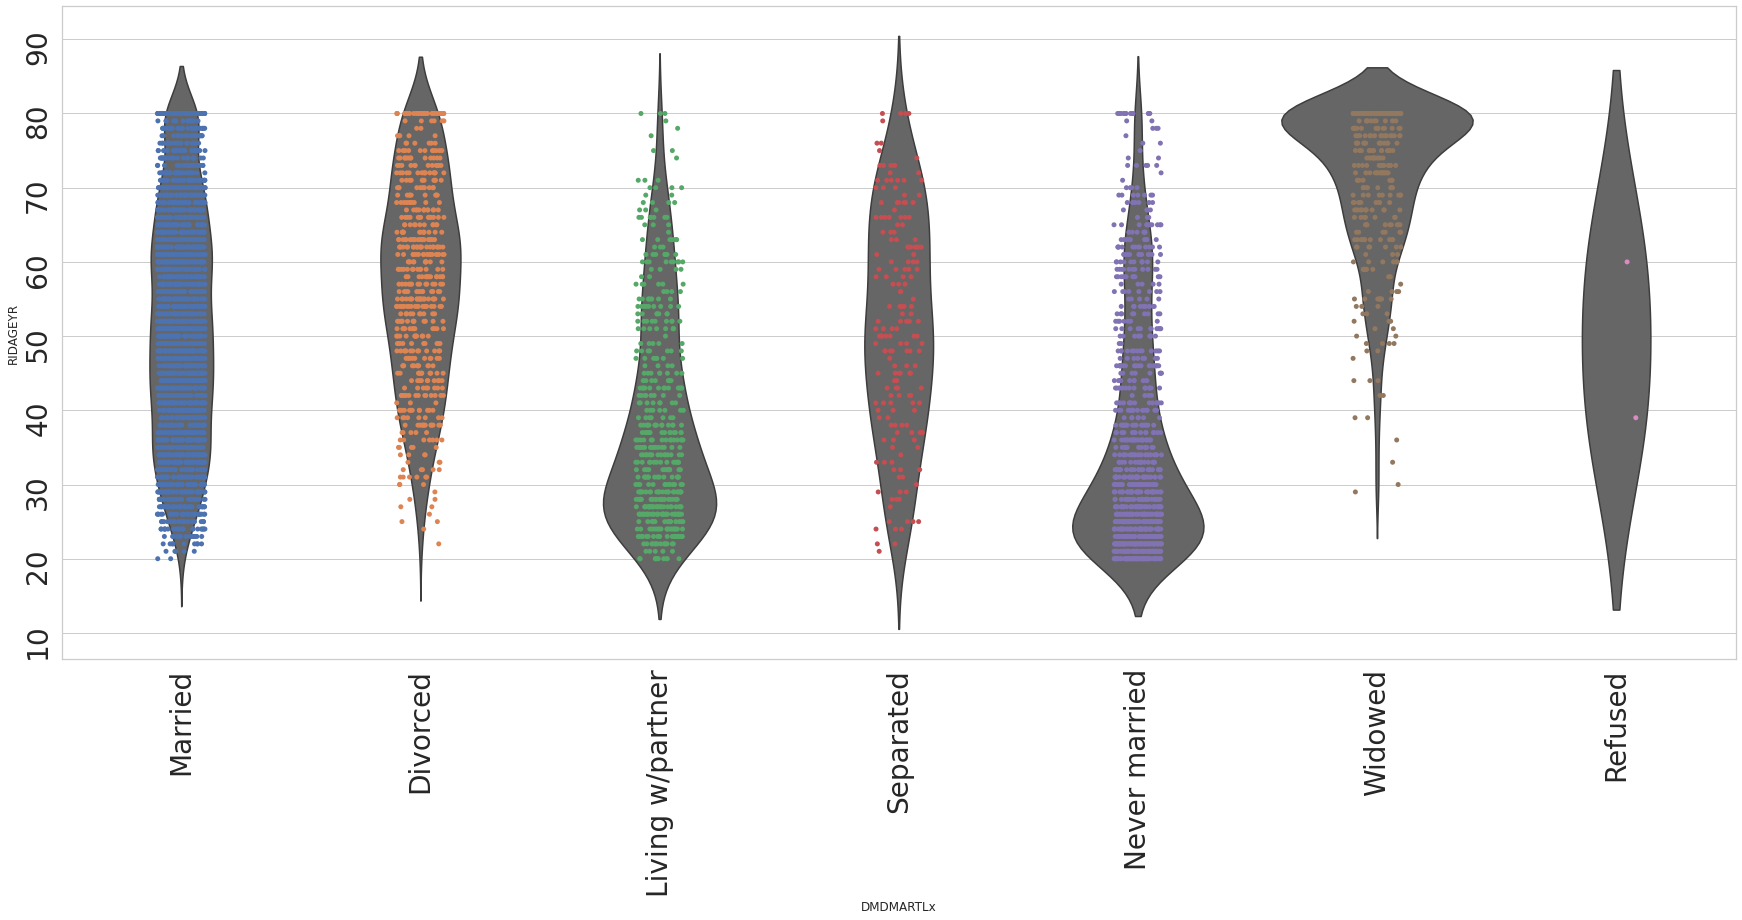

In [ ]:
fig, ax = plt.subplots(figsize=(30, 12))
ax = sns.violinplot(x= "DMDMARTLx", y="RIDAGEYR", data=df, inner=None, color="0.4")
ax = sns.stripplot(x= "DMDMARTLx", y="RIDAGEYR", data=df)
ax.tick_params(rotation=90, labelsize=28)

It shows the marital status for each age range. Look at the violin for ‘married’. Throughout it is almost stable with some little bumps. ‘Living with partner’ is very high in the age range of the 30s. It drastically lowers after 40. In the same way, you can infer the ideas from the rest of the plots.

It will be even more informative if we can see violin plots segregated by gender.

Let’s do that. Instead of age, let’s go back to Diastolic blood pressure. This time we will see Diastolic blood pressure vs Marital status segregated by gender. Also distribution of diastolic blood pressure by the side.

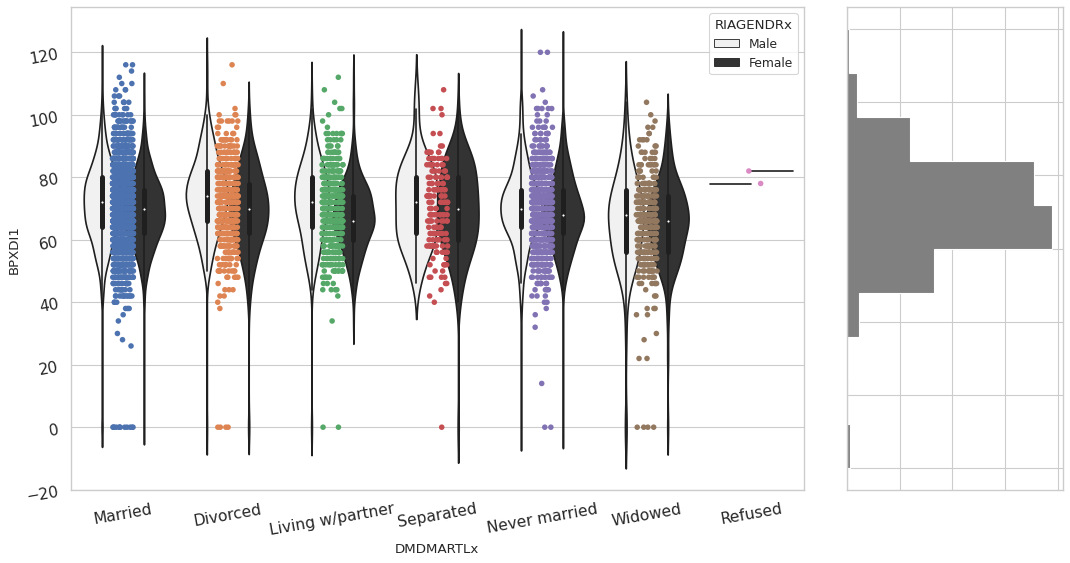

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=80)
grid=plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:, :-1])
ax_right = fig.add_subplot(grid[:, -1], xticklabels=[], yticklabels=[])
sns.violinplot(x= "DMDMARTLx", y = "BPXDI1", hue = "RIAGENDRx", data = df, color= "0.2", ax=ax_main)
sns.stripplot(x= "DMDMARTLx", y = "BPXDI1", data = df, ax=ax_main)
ax_right.hist(df.BPXDI1, histtype='stepfilled', orientation='horizontal', color='grey')
ax_main.title.set_fontsize(14)
ax_main.tick_params(rotation=10, labelsize=14)
plt.show()

Cool, right? Look how much information you can draw from this! This type of plot can be very useful for a presentation or a research report as well.

### Adding a Linear Regression Line in the Bubbles

This time I will plot height(BMXHT) vs weight(BMXWT) segregated by gender(RIAGENDR). I will explain some more after making the plot.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


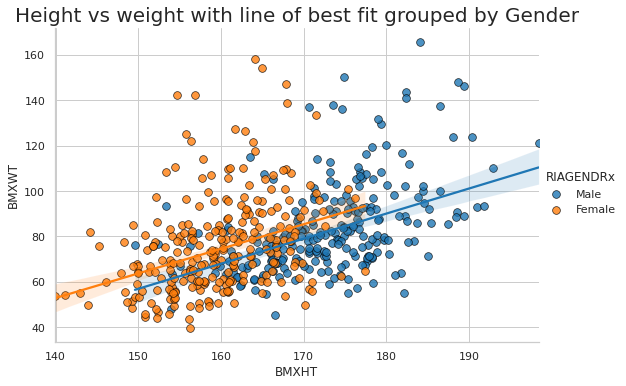

In [ ]:
g = sns.lmplot(x='BMXHT', y='BMXWT', hue = 'RIAGENDRx', data = df2,
              aspect = 1.5, robust=True, palette='tab10',
              scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title("Height vs weight with line of best fit grouped by Gender", fontsize=20)
plt.show()

You can see the segregation between male and female in the plot. ‘hue’ parameter does the segregation. It is obvious in the picture that height and weight are higher in the male population overall. There are linear regression lines for both male and female data.

### Individual Bubble Plots With Regression Line

We put male and female data both in the same plot and it works because there is clear segregation and it’s only two types. But sometimes segregation is not clear and there are too many categories.

In this section, I will make the lmplot in separate plots. Height and weight may be different for different ethnic origins(RIDRETH1). Instead of gender, we will plot height and weight segregated by ethnic origins in separate plots.

<Figure size 1600x640 with 0 Axes>

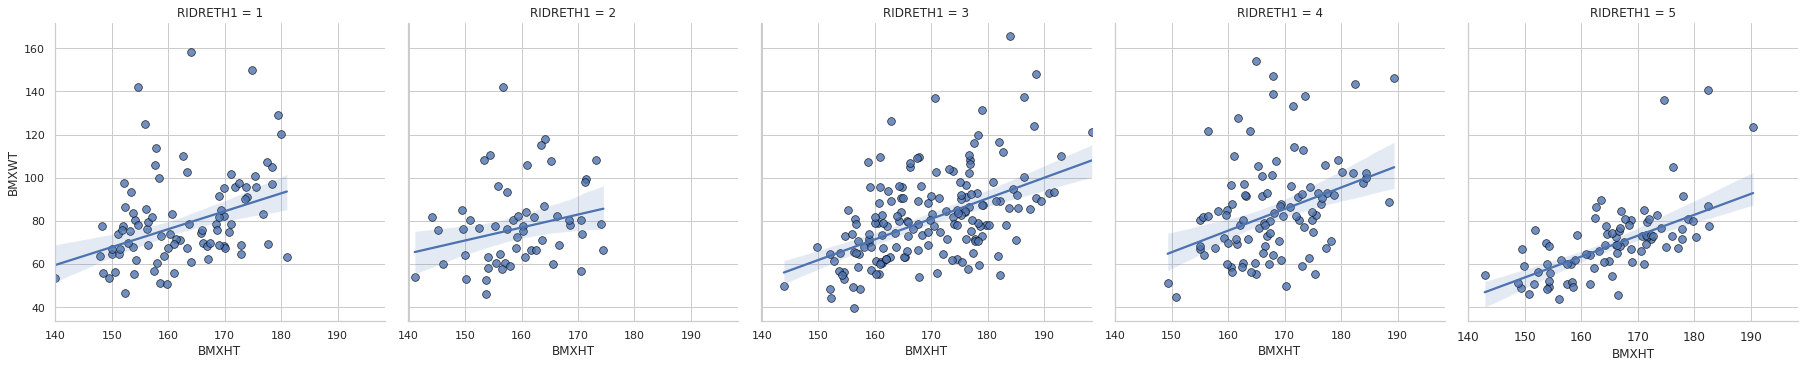

In [ ]:
fig = plt.figure(figsize=(20, 8), dpi=80)
g = sns.lmplot(x='BMXHT', y='BMXWT', data = df2, robust = True,
              palette="Set1", col="RIDRETH1",
              scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
plt.xticks(fontsize=12, )
plt.yticks(fontsize=12)
plt.show()

### Pairplot

Pair plots are very popular in exploratory data analysis. It shows the relationship of all the variables amongst each other. Here is an example. I will make a pair plot of height, weight, BMI, and waist sizes segregated by ethnic origin. I am taking the first 1000 data only because that might make the plot a bit clearer.

<Figure size 800x640 with 0 Axes>

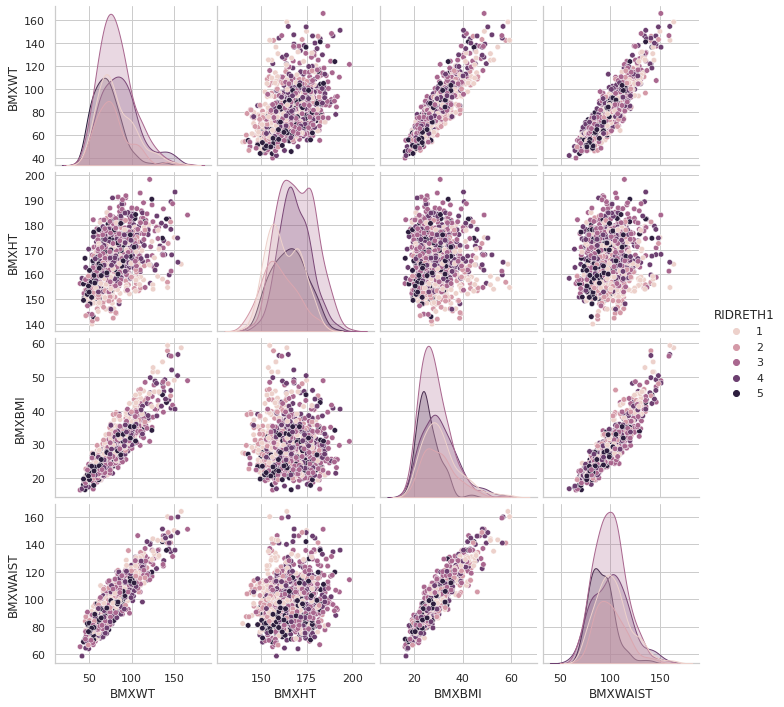

In [ ]:
df3 = df.loc[:1000, :]
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df3[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', "RIDRETH1"]], kind="scatter", hue="RIDRETH1", plot_kws=dict(s=30))

plt.show()

### Diverging Bars

It gives a quick intuition about the data. You can see just in one glimpse how data deviates from one metric. Here I will show two types. The first one will involve one categorical variable on the x-axis and the second one will have two continuous variables.

Here is the first one. I will plot the housing size in the y-axis which is a categorical variable. And normalized systolic blood pressure on the x-axis. We will normalize systolic blood pressure using a standard normalization formula and segregate the data at that point.

There will be two colors. Red will denote the negative side and blue will denote the positive side.

This plot will show you how systolic blood pressure varies over housing size at a glance.

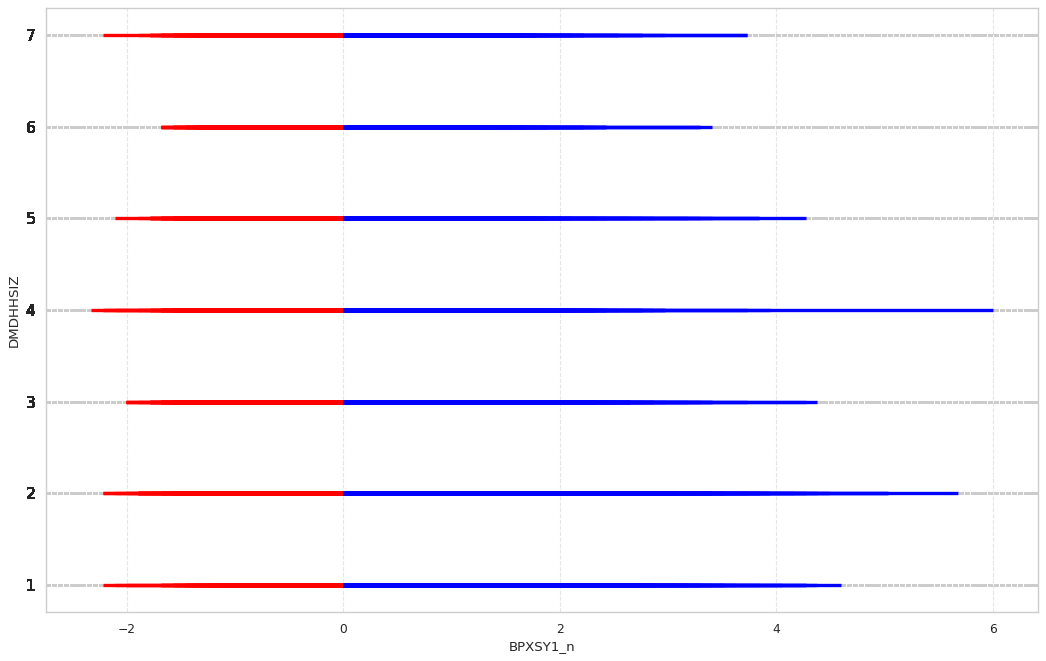

In [ ]:
x = df.loc[:, "BPXSY1"]
df["BPXSY1_n"] = (x - x.mean())/x.std()
df['colors'] = ['red' if i < 0 else 'blue' for i in df["BPXSY1_n"]]
df.sort_values("BPXSY1_n", inplace=True)
df.reset_index(inplace=True)
plt.figure(figsize=(16, 10), dpi=80)
plt.hlines(y = df.DMDHHSIZ, xmin=0, xmax = df.BPXSY1_n, color=df.colors, linewidth=3)
plt.gca().set(ylabel="DMDHHSIZ", xlabel = "BPXSY1_n")
plt.yticks(df.DMDHHSIZ, fontsize=14)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Here housing size has different groups. In the dataset, it does not show which group has what housing size. But you can see from the plot above that systolic blood pressure changes over housing size. The change shows very clearly. Now, you can analyze further on it.

I will make another plot where I will plot systolic blood pressure vs age. We already normalized the systolic blood pressure in the previous plot. Let’s just dive into the plot.

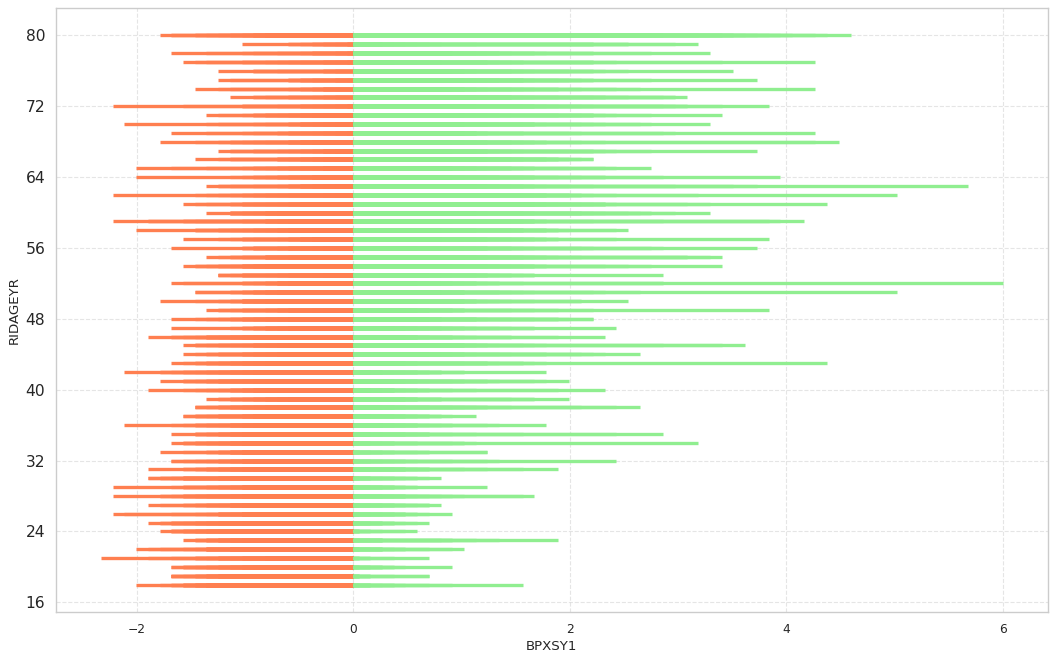

In [ ]:
x = df.loc[:, "BPXSY1"]
df['colors'] = ['coral' if i < 0 else 'lightgreen' for i in df["BPXSY1_n"]]
y_ticks = np.arange(16, 82, 8)
plt.figure(figsize=(16, 10), dpi=80)
plt.hlines(y = df.RIDAGEYR, xmin=0, xmax = df.BPXSY1_n, color=df.colors, linewidth=3)
plt.gca().set(ylabel="RIDAGEYR", xlabel = "BPXSY1")
plt.yticks(y_ticks, fontsize=14)
plt.grid(linestyle='--', alpha=0.5)
plt.show()

The variation of systolic blood pressure with age looks so evident. Overall systolic blood pressure goes upwards with growing age. Isn’t it?